In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

In [84]:
bi_16=\
[
    [0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
    [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
    [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
    [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]
]

ad= QuantumRegister(4, name='ad')
ad_sw = QuantumRegister(1, name='ad_sw')
row = QuantumRegister(4, name='row')
column = QuantumRegister(4, name='column')
flag = QuantumRegister(2, name='flag')
flag2=QuantumRegister(1, name='flag2')
ancilla = QuantumRegister(7, name='a')
cbits = ClassicalRegister(4,name='c')

#qc = QuantumCircuit(ad,ad_sw,row,column,flag,cbits)

In [85]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

In [86]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$U_diff$"
    return U_s

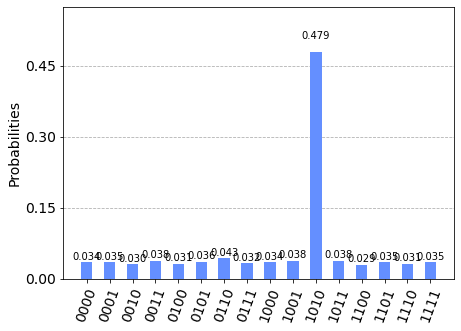

In [88]:

qc = QuantumCircuit(ad,ad_sw,row,column,flag,flag2,ancilla,cbits)
qc.h(ad)
qc.x(flag2)
qc.h(flag2)

a=0
for problem in problem_set:
    #x gate
    for b in range(4):
        if bi_16[a][b]==0:
            qc.x(ad[3-b])
    #ad--mct-->ad_sw
    qc.mct(ad,ad_sw[0],ancilla,mode='basic')
    #address set up------------------------------------------ 
    for i in range(5):
        for j in range(i+1,6):
            for k in range(0,6):
                if(k!=i and k!=j):
                    m=int(problem[k][0])
                    n=int(problem[k][1])
                    qc.cx(ad_sw,row[m])
                    qc.cx(ad_sw,column[n])
            qc.mct([row[0],row[1],row[2],row[3],column[0],column[1],column[2],column[3],flag[0]],flag[1],ancilla,mode='basic')
            qc.mct([row[0],row[1],row[2],row[3],column[0],column[1],column[2],column[3]],flag[1],ancilla,mode='basic')
            for k in range(0,6):
                if(k!=i and k!=j):
                    m=int(problem[k][0])
                    n=int(problem[k][1])
                    qc.cx(ad_sw,row[m])
                    qc.cx(ad_sw,column[n])

    qc.x(flag[0])
    qc.ccx(flag[0],flag[1],flag2[0])
    qc.x(flag[0])

    for i in range(5):
        for j in range(i+1,6):
            for k in range(0,6):
                if(k!=i and k!=j):
                    m=int(problem[k][0])
                    n=int(problem[k][1])
                    qc.cx(ad_sw,row[m])
                    qc.cx(ad_sw,column[n])
            qc.mct([row[0],row[1],row[2],row[3],column[0],column[1],column[2],column[3],flag[0]],flag[1],ancilla,mode='basic')
            qc.mct([row[0],row[1],row[2],row[3],column[0],column[1],column[2],column[3]],flag[1],ancilla,mode='basic')
            for k in range(0,6):
                if(k!=i and k!=j):
                    m=int(problem[k][0])
                    n=int(problem[k][1])
                    qc.cx(ad_sw,row[m])
                    qc.cx(ad_sw,column[n])
    #address set up-----------------------------------------
    qc.mct(ad,ad_sw[0],ancilla,mode='basic')
    #x gate
    for b in range(4):
        if bi_16[a][b]==0:
            qc.x(ad[3-b])
    a=a+1
    
    
qc.append(diffuser(4),[0,1,2,3])    
    

qc.measure(ad,cbits)



qasm_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=qasm_simulator, shots=1024).result()
plot_histogram(result.get_counts())
#qc.draw()


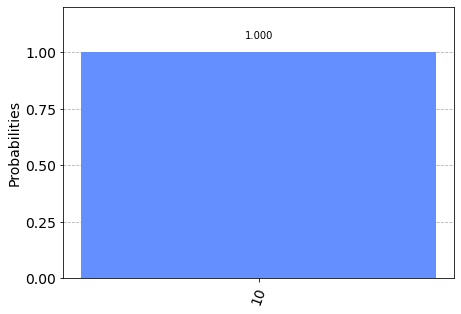

In [76]:

qc.measure(flag,cbits)
qasm_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=qasm_simulator, shots=1024).result()
plot_histogram(result.get_counts())

In [20]:
def counter(qc,r_or_c,auxiliary):
    for i in range(len(r_or_c)):
        qc.mct([r_or_c[i],auxiliary[0],auxiliary[1]],auxiliary[2],mode='noancilla')
        qc.ccx(r_or_c[i],auxiliary[0],auxiliary[1])
        qc.cx(r_or_c[i],auxiliary[0])

        
def counterd(qc,r_or_c,auxiliary):
    for i in range(len(r_or_c)):
        qc.cx(r_or_c[3-i],auxiliary[0])           
        qc.ccx(r_or_c[3-i],auxiliary[0],auxiliary[1])        
        qc.mct([r_or_c[3-i],auxiliary[0],auxiliary[1]],auxiliary[2],mode='noancilla')


def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$U_diff$"
    return U_s

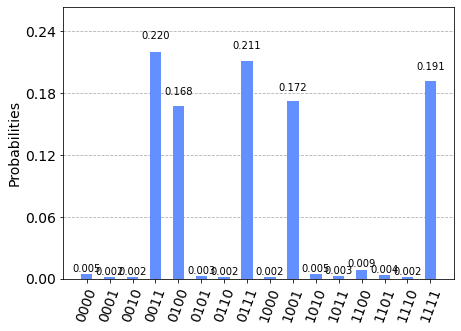

In [21]:
qc.h(ad)
qc.x(flag)
qc.h(flag)

i=0
for problem in problem_set:
    #x gate
    for j in range(4):
        if bi_16[i][j]==0:
            qc.x(ad[3-j])
    #ad--mct-->ad_sw
    qc.mct(ad,ad_sw[0],mode='noancilla')
    #address set up------------------------------------------
    for area in problem:
        j=int(area[0])
        k=int(area[1])
        qc.cx(ad_sw[0],row[j])
        qc.cx(ad_sw[0],column[k])
    qc.barrier()
    counter(qc,row,ct_r)
    counter(qc,column,ct_c)  
    
    #------flip 1
    qc.x(ct_r[0])
    qc.x(ct_r[2])
    qc.x(ct_c[0])
    qc.x(ct_c[2])
    qc.mct([ct_r[:],ct_c[:]])
    qc.x(ct_r[0])
    qc.x(ct_r[2])
    qc.x(ct_c[0])
    qc.x(ct_c[2])
    #-------flip 2
    
    #-------flip 3
    counter(qc,column,ct_c) 
    counter(qc,row,ct_r)
    qc.barrier()
    for area in problem:
        j=int(area[0])
        k=int(area[1])
        qc.cx(ad_sw[0],row[j])
        qc.cx(ad_sw[0],column[k])
    #address set up------------------------------------------
    qc.mct(ad,ad_sw[0],mode='noancilla')
    #x gate
    for j in range(4):
        if bi_16[i][j]==0:
            qc.x(ad[3-j])
    i=i+1
    
qc.append(diffuser(4),[0,1,2,3])
qc.measure(ad,cbits)
qasm_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=qasm_simulator, shots=1024).result()
plot_histogram(result.get_counts())

In [22]:
qc.draw()

In [28]:
ad= QuantumRegister(4, name='ad')
ad_sw = QuantumRegister(1, name='ad_sw')
row = QuantumRegister(4, name='row')
column = QuantumRegister(4, name='column')
ct = QuantumRegister(3, name='ct')
flag = QuantumRegister(1, name='flag')
cbits = ClassicalRegister(3,name='c')

problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

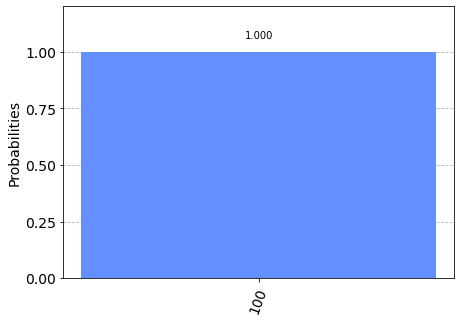

In [29]:
problem=[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']]
qc = QuantumCircuit(ad,ad_sw,row,column,ct,flag, cbits)
qc.x(ad_sw)
for area in problem:
    j=int(area[0])
    k=int(area[1])
    qc.cx(ad_sw[0],row[j])
    qc.cx(ad_sw[0],column[k])
qc.barrier()
counter(qc,row,column,ct)
qc.measure(ct,cbits)
"""
qc.x(ct[0])
qc.ccx(ct[0],ct[2],flag)
qc.x(ct[0])
counterd(qc,row,column,ct)
qc.barrier()
for area in problem:
    j=int(area[0])
    k=int(area[1])
    qc.cx(ad_sw[0],row[j])
    qc.cx(ad_sw[0],column[k])
qc.measure(flag,cbits)
"""
qasm_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=qasm_simulator, shots=1024).result()
plot_histogram(result.get_counts())

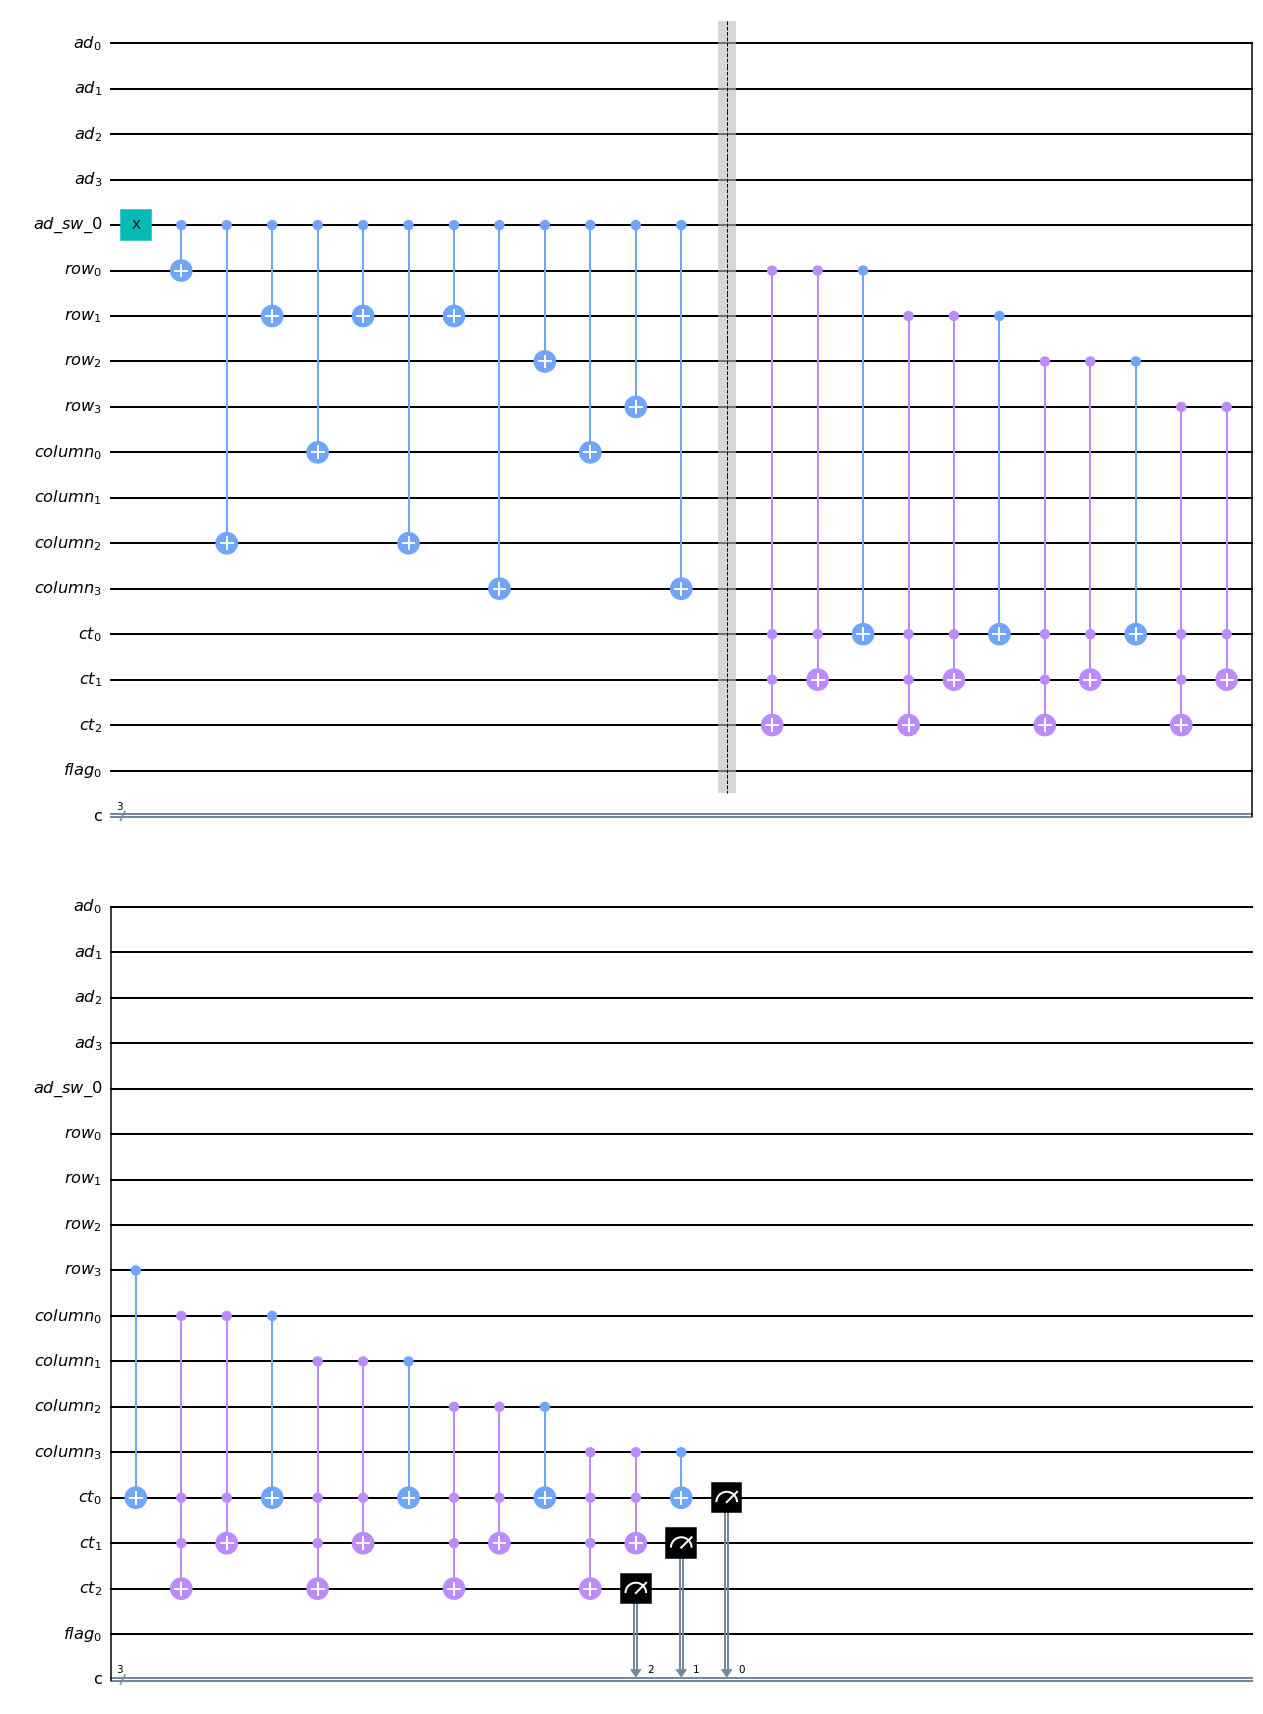

In [30]:
qc.draw()